In [ ]:
# ---- Installation ---- #

!pip install gdown

# ---- gdown installed ---- #

In [ ]:
# מגישים נתנאל אלקיים דניאלה לייבה אלון גלר

In [ ]:
# ---- Imports ---- #

import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import gdown
import zipfile
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet

# ---- End of imports ---- #

In [ ]:
# ---- Bringing the dataset ---- #

url = 'https://drive.google.com/uc?id=1FrMVbqWPCLdil8ZK1BZ415hGnpE3ZFYY' # Download the zip from google drive
output = 'dataset.zip' # Save the output
gdown.download(url, output, quiet=False)

# ---- Extract the data from the zip ---- #

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset')

data = glob('/content/dataset/**/*.png', recursive=True)

# ---- Data exctracted ---- #
# ---- Data was brought ---- #

Downloading...
From: https://drive.google.com/uc?id=1FrMVbqWPCLdil8ZK1BZ415hGnpE3ZFYY
To: /content/dataset.zip
100%|██████████| 3.33G/3.33G [00:45<00:00, 73.6MB/s]


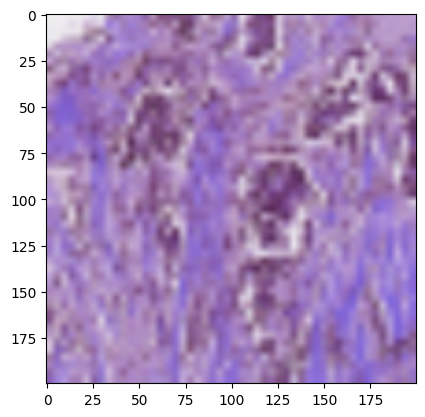

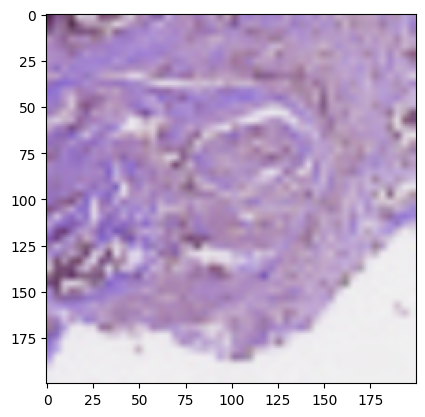

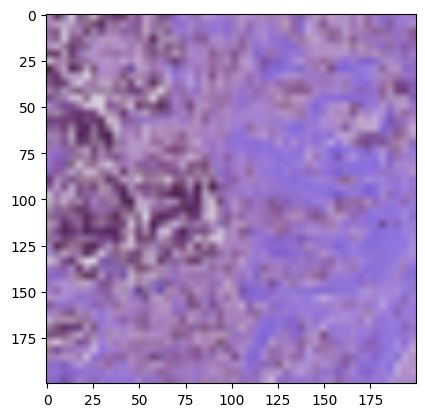

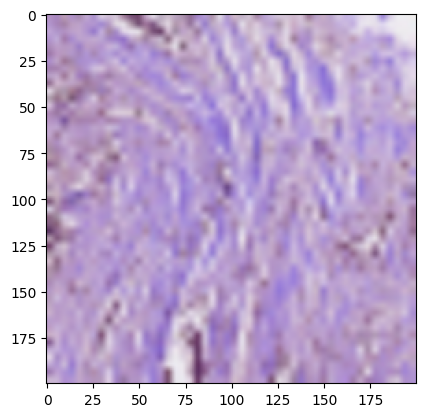

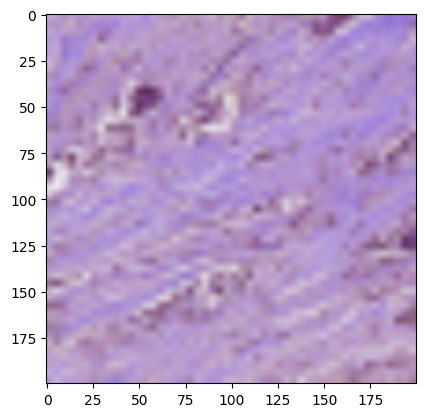

In [ ]:
# ---- data Visualization(5 images) ---- #

for i in data[:5]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

# ---- Data visualized ---- #

In [ ]:
# ---- Data Prepration ---- #

images=[] # Images storage
labels=[] # Label storage

# ----  Iterate over 8000 images out of the entire data ---- #
for i in data[:8000]:
    if i.endswith('.png'): # If its png file save it
        label=i[-5] # The files name convention means that the label is in the -5 position of the name
        img=cv2.imread(i) # Read the image
        img_1=cv2.resize(img,(100,100)) # Resize the image
        images.append(img_1) # Save the image
        labels.append(label) # Save the label

# ---- End of iteration ---- #

x=np.stack(images) # Data flattening(create the features vector)
y=to_categorical(labels) # Create the target vector
x=x/255
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2) # Split the data

In [ ]:
model = models.Sequential()  # Sequential model
model.add(MobileNet(include_top=False, weights="imagenet", input_shape=(100, 100, 3)))  # MobileNet instead of EfficientNet
model.add(layers.GlobalAveragePooling2D())  # Pooling layer
model.add(layers.Dense(2, activation="sigmoid"))  # Classifier layer
model.summary()
opt = Adam(lr=0.00005)  # Optimizer
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])  # Model compilation (Binary classifier)
history=model.fit(x_train,y_train,epochs=20,validation_split=0.3,batch_size=56) # Train the model
loss,accuracy=model.evaluate(x_test,y_test) # Check the model on the test data

17225924/17225924 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2050      
                                                                 
Total params: 3,230,914
Trainable params: 3,209,026
Non-trainable params: 21,888
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
80/80 [==============================] - 18s 73ms/step - loss: 0.5592 - acc: 0.7585 - val_loss: 0.5034 - val_acc: 0.8021
Epoch 2/20
80/80 [==============================] - 4s 52ms/step - loss: 0.2486 - acc: 0.9096 - val_loss: 0.4326 - val_acc: 0.8375
Epoch 3/20
80/80 [==============================] - 4s 52ms/step - loss: 0.1485 - acc: 0.9536 - val_loss: 0.3476 - val_acc: 0.8708
Epoch 4/20
80/80 [==============================] - 4s 52ms/step - loss: 0.1010 - acc: 0.9775 - val_loss: 0.3451 - val_acc: 0.8703
Epoch 5/20
80/80 [==============================] - 4s 53ms/step - loss: 0.0649 - acc: 0.9900 - val_loss: 0.3383 - val_acc: 0.8786
Epoch 6/20
80/80 [==============================] - 4s 52ms/step - loss: 0.0460 - acc: 0.9949 - val_loss: 0.3180 - val_acc: 0.8823
Epoch 7/20
80/80 [==============================] - 4s 52ms/step - loss: 0.0372 - acc: 0.9964 - val_loss: 0.3386 - val_acc: 0.8792
Epoch 8/20
80/80 [==============================] - 4s 56ms/step - loss: 0.0264 - 

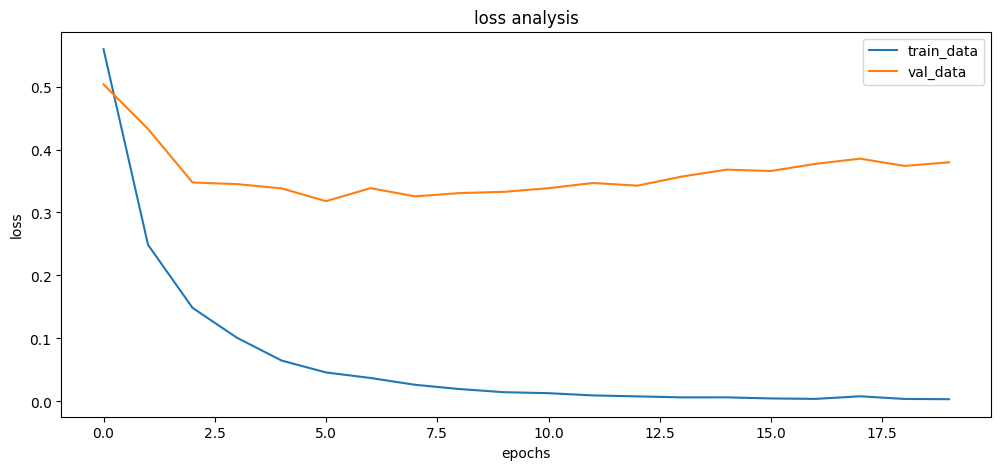

In [ ]:
# ---- Training stage visualization(loss) ---- #

plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','val_data'])
plt.title('loss analysis')
plt.show()

# ----End of training stage visualization(loss) ---- #


In [ ]:
# ---- Model creation ---- #

model = models.Sequential() # Sequential model
model.add(EfficientNetB0(include_top = False, weights = "imagenet",input_shape=(100,100, 3))) # We checked different works in the field and saw that EfficientNet is giving the best results
model.add(layers.GlobalAveragePooling2D()) # Pooling layer
model.add(layers.Dense(2, activation = "sigmoid")) # Calssifier layer
model.summary()
opt = Adam(lr=0.00005) # Optimaizer
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc']) # Model compliation(Binary calssifier)
# ---- Model created ---- #

16705208/16705208 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.3,batch_size=56) # Train the model

Epoch 1/20
80/80 [==============================] - 21s 165ms/step - loss: 0.5185 - acc: 0.7786 - val_loss: 0.9144 - val_acc: 0.2286
Epoch 2/20
80/80 [==============================] - 10s 125ms/step - loss: 0.3151 - acc: 0.8839 - val_loss: 0.7151 - val_acc: 0.4328
Epoch 3/20
80/80 [==============================] - 10s 126ms/step - loss: 0.2371 - acc: 0.9031 - val_loss: 0.6087 - val_acc: 0.7000
Epoch 4/20
80/80 [==============================] - 10s 120ms/step - loss: 0.1945 - acc: 0.9217 - val_loss: 0.6153 - val_acc: 0.7068
Epoch 5/20
80/80 [==============================] - 10s 120ms/step - loss: 0.1624 - acc: 0.9373 - val_loss: 0.6992 - val_acc: 0.7688
Epoch 6/20
80/80 [==============================] - 10s 124ms/step - loss: 0.1272 - acc: 0.9511 - val_loss: 0.6236 - val_acc: 0.6604
Epoch 7/20
80/80 [==============================] - 10s 123ms/step - loss: 0.1090 - acc: 0.9585 - val_loss: 0.5639 - val_acc: 0.7589
Epoch 8/20
80/80 [==============================] - 10s 123ms/step - 

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test) # Check the model on the test data

50/50 [==============================] - 2s 19ms/step - loss: 0.9183 - acc: 0.5950


50/50 [==============================] - 3s 17ms/step


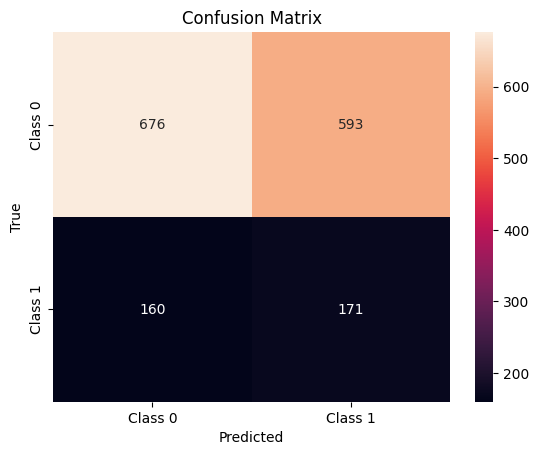

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x_test and y_test are the test data inputs and labels, respectively

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

# Make predictions on the test data
y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob).astype(int).flatten()  # Convert probabilities to binary predictions

# Convert y_test to binary labels
y_test_binary = np.argmax(y_test, axis=1)

# Ensure y_test and y_pred have the same shape
y_pred = y_pred[:len(y_test_binary)]

# Compute the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred)

# Visualize the confusion matrix
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


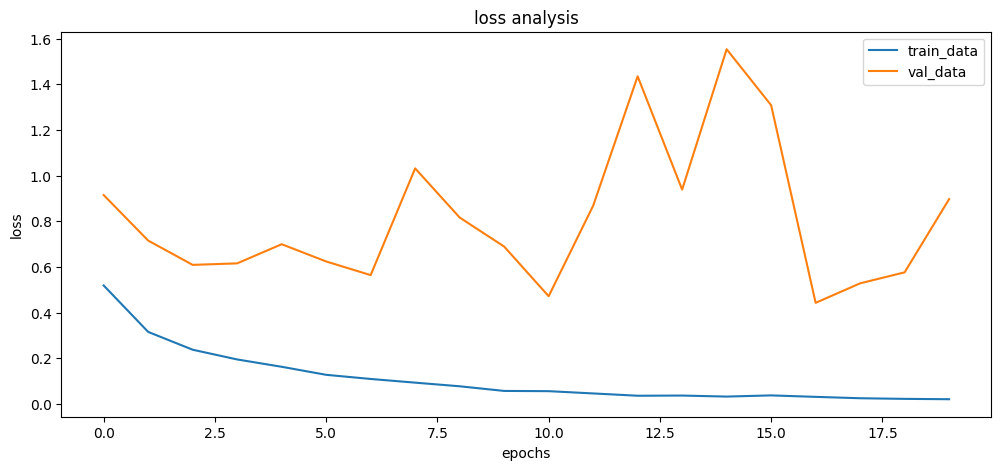

In [ ]:
# ---- Training stage visualization(loss) ---- #

plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','val_data'])
plt.title('loss analysis')
plt.show()

# ----End of training stage visualization(loss) ---- #


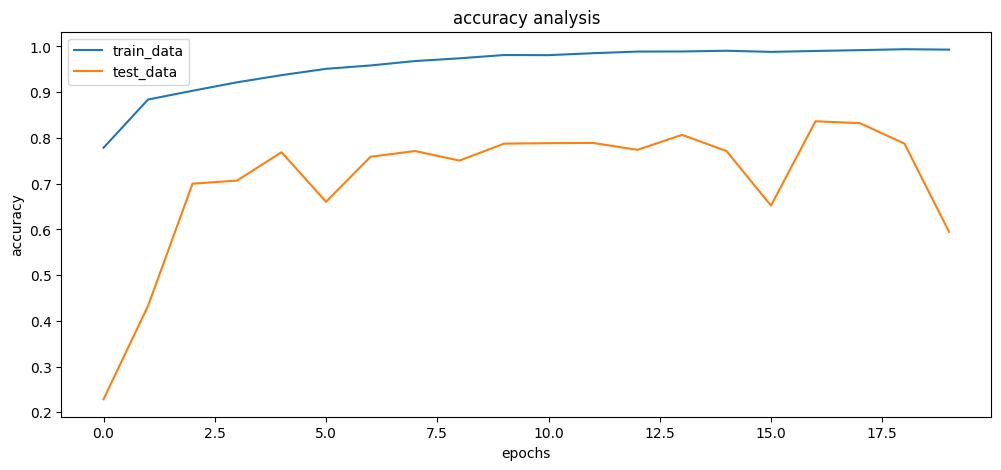

In [ ]:
# ---- Training stage visualization(accuracy) ---- #

plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()

# ---- End of training stage visualization(accuracy) ---- #

In [ ]:
# ---- Show a single image prediction ---- #

IMG = Image.open('../content/dataset/10253/0/10253_idx5_x1001_y1101_class0.png')
print(type(IMG))
IMG = IMG.resize((100, 100))
IMG = np.array(IMG)
print('po array = {}'.format(IMG.shape))
IMG = np.true_divide(IMG, 255)
IMG = IMG.reshape(-1,100, 100,3)
print(type(IMG), IMG.shape)
predictions_c = model.predict(IMG)
print(predictions_c)

# ---- Prediction given ---- #

<class 'PIL.PngImagePlugin.PngImageFile'>
po array = (100, 100, 3)
<class 'numpy.ndarray'> (1, 100, 100, 3)
1/1 [==============================] - 2s 2s/step
[[0.16396198 0.6989773 ]]
